<a href="https://colab.research.google.com/github/siddharth101/Double_suspension/blob/main/Tension_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

from sympy import zeros, symbols
from sympy import eye, Matrix
import sympy.physics.mechanics as me
from sympy import expand
from sympy.parsing.sympy_parser import parse_expr
from sympy.physics.mechanics import Body, PinJoint, PrismaticJoint, JointsMethod, inertia
from sympy.physics.mechanics import dynamicsymbols
from sympy.physics.mechanics import dynamicsymbols, ReferenceFrame, outer
from sympy.physics.mechanics import ReferenceFrame, Point, RigidBody
from sympy.physics.mechanics import kinetic_energy, potential_energy, Point, Particle

import sympy as smp
import numpy as np
import matplotlib.pyplot as plt

smp.init_printing(use_latex='mathjax')

In [2]:
!ls sample_data/

anscombe.json		      mnist_test.csv	     single_block_4_wires.png
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  README.md


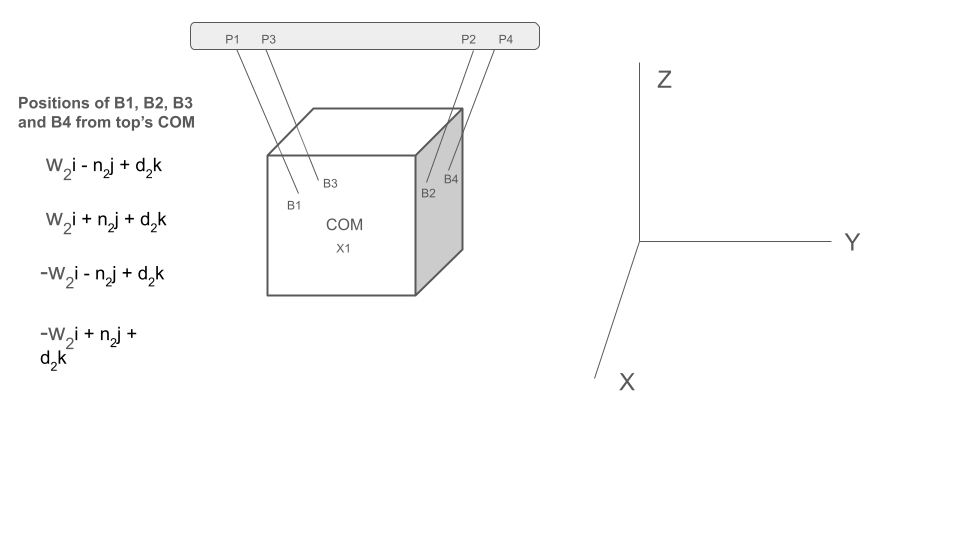

In [3]:
import cv2
from google.colab.patches import cv2_imshow
# Open the image.
img = cv2.imread("/content/sample_data/single_block_4_wires.png")
cv2_imshow(img)

In [4]:
q1, q2, q3, q4, q5, q6, q7, u1, u2, u3, u4, u5, u6, u7, x_n1, x_n2, x_01, x_02 = dynamicsymbols('q1 q2 q3 q4 q5 q6 q7 u1 u2 u3 u4 u5 u6 u7 x_n1 x_n2 x_01 x_02')
M1, M2, k1, k2, g, ixx1, ixx2, iyy1, iyy2, izz1, izz2, c1, c2, t = symbols('M1 M2 k1 k2 g ixx1 ixx2 iyy1 iyy2 izz1 izz2 c1 c2 t')
T1, T2, T3, T4 = symbols('T1 T2 T3 T4')
gamma, alpha1, alpha2, beta1, beta2, omega1, omega2 = dynamicsymbols('gamma, alpha1, alpha2, beta1, beta2, omega1, omega2')
d1, d2, n1, n2, w1, w2 = symbols('d1 d2 n1 n2 w1 w2', real=True, positive=True)

In [5]:
N = ReferenceFrame('N') # this is the global frame
N_a = ReferenceFrame('N_a') # this is the  frame of suspension point
A = ReferenceFrame('A') # this is the frame of the first body
B = ReferenceFrame('B') # this is the frame of the second body

A.orient_axis(N, 0, N.z) # Initially A and N are parallel
B.orient_axis(N, 0, N.z) # Initially B and N are parallel
N_a.orient_axis(N, 0, N.z) # Initially N and N_a are parallel

In [6]:
O = Point('O')
P = Point('P')
P1 = Point('P1')
P2 = Point('P2')
P3 = Point('P3')
P4 = Point('P4')
X1 = Point('X1')
B1 = Point('B1')
B2 = Point('B2')
B3 = Point('B3')
B4 = Point('B4')

In [7]:
P.set_pos(O, q2*N.y)
X1.set_pos(O,  q1*N.x + q2*N.y -q4*N.z)


P1.set_pos(P, w1*N_a.x - n1*N_a.y + d1*N_a.z)
P2.set_pos(P, w1*N_a.x + n1*N_a.y + d1*N_a.z)
P3.set_pos(P, -w1*N_a.x - n1*N_a.y + d1*N_a.z)
P4.set_pos(P, -w1*N_a.x + n1*N_a.y + d1*N_a.z)

In [8]:
B1.set_pos(X1, w2*A.x +  d2*A.z - n2*A.y)
B2.set_pos(X1, w2*A.x +  d2*A.z + n2*A.y)
B3.set_pos(X1, -w2*A.x + d2*A.z - n2*A.y)
B4.set_pos(X1, -w2*A.x + d2*A.z + n2*A.y)

In [9]:
def pos(point1, point2, frame=N, normalize=False):

  pos = point1.pos_from(point2).express(frame)

  if normalize:
    pos = pos.normalize()
  else:
    pass
  return pos

In [10]:
pos(P1, B1, N, normalize=True)

                     w₁ - w₂ - q₁(t)
────────────────────────────────────────────────────────── n_x + ─────────────
   _______________________________________________________          __________
  ╱           2                    2                    2          ╱
╲╱  (-n₁ + n₂)  + (d₁ - d₂ + q₄(t))  + (w₁ - w₂ - q₁(t))         ╲╱  (-n₁ + n₂

            -n₁ + n₂                                                     d₁ -
───────────────────────────────────────────── n_y + ──────────────────────────
_____________________________________________          _______________________
 2                    2                    2          ╱           2
)  + (d₁ - d₂ + q₄(t))  + (w₁ - w₂ - q₁(t))         ╲╱  (-n₁ + n₂)  + (d₁ - d₂

d₂ + q₄(t)
──────────────────────────────── n_z
________________________________
         2                    2
 + q₄(t))  + (w₁ - w₂ - q₁(t))

In [11]:
pos(P2, B2, N)

(w₁ - w₂ - q₁(t)) n_x + (n₁ - n₂) n_y + (d₁ - d₂ + q₄(t)) n_z

In [12]:
l1, l2, l3, l4, l = symbols('l1 l2 l3 l4, l', real=True, positive=True)

In [13]:
dirT1, dirT2, dirT3, dirT4 = pos(P1, B1, N, normalize=True), pos(P2, B2, N, normalize=True), pos(P3, B3, N, normalize=True), pos(P4, B4, N, normalize=True)

In [14]:
dirT1

                     w₁ - w₂ - q₁(t)
────────────────────────────────────────────────────────── n_x + ─────────────
   _______________________________________________________          __________
  ╱           2                    2                    2          ╱
╲╱  (-n₁ + n₂)  + (d₁ - d₂ + q₄(t))  + (w₁ - w₂ - q₁(t))         ╲╱  (-n₁ + n₂

            -n₁ + n₂                                                     d₁ -
───────────────────────────────────────────── n_y + ──────────────────────────
_____________________________________________          _______________________
 2                    2                    2          ╱           2
)  + (d₁ - d₂ + q₄(t))  + (w₁ - w₂ - q₁(t))         ╲╱  (-n₁ + n₂)  + (d₁ - d₂

d₂ + q₄(t)
──────────────────────────────── n_z
________________________________
         2                    2
 + q₄(t))  + (w₁ - w₂ - q₁(t))

In [15]:
net_torque = pos(B1, X1, N).cross(dirT1)*T1 + pos(B2, X1, N).cross(dirT2)*T2 + pos(B3, X1, N).cross(dirT3)*T3 + pos(B4, X1, N).cross(dirT4)*T4

In [16]:
l1_len, l2_len, l3_len, l4_len = pos(P1, B1, N).magnitude(), pos(P2, B2, N).magnitude(), pos(P3, B3, N).magnitude(), pos(P4, B4, N).magnitude()

In [17]:
l1_len

   _______________________________________________________
  ╱           2                    2                    2 
╲╱  (-n₁ + n₂)  + (d₁ - d₂ + q₄(t))  + (w₁ - w₂ - q₁(t))  

In [18]:
l2_len

   ______________________________________________________
  ╱          2                    2                    2 
╲╱  (n₁ - n₂)  + (d₁ - d₂ + q₄(t))  + (w₁ - w₂ - q₁(t))  

In [19]:
net_torque_ = net_torque.subs({l1_len:l1, l2_len:l2, l3_len:l3, l4_len:l4})

In [20]:
net_torque_

⎛   ⎛  d₂⋅(-n₁ + n₂)   n₂⋅(d₁ - d₂ + q₄(t))⎞      ⎛  d₂⋅(n₁ - n₂)   n₂⋅(d₁ - d
⎜T₁⋅⎜- ───────────── - ────────────────────⎟ + T₂⋅⎜- ──────────── + ──────────
⎝   ⎝        l₁                 l₁         ⎠      ⎝       l₂                 l

₂ + q₄(t))⎞      ⎛  d₂⋅(-n₁ + n₂)   n₂⋅(d₁ - d₂ + q₄(t))⎞      ⎛  d₂⋅(n₁ - n₂)
──────────⎟ + T₃⋅⎜- ───────────── - ────────────────────⎟ + T₄⋅⎜- ────────────
₂         ⎠      ⎝        l₃                 l₃         ⎠      ⎝       l₄

   n₂⋅(d₁ - d₂ + q₄(t))⎞⎞       ⎛   ⎛d₂⋅(w₁ - w₂ - q₁(t))   w₂⋅(d₁ - d₂ + q₄(t
 + ────────────────────⎟⎟ n_x + ⎜T₁⋅⎜──────────────────── - ──────────────────
            l₄         ⎠⎠       ⎝   ⎝         l₁                     l₁

))⎞      ⎛d₂⋅(w₁ - w₂ - q₁(t))   w₂⋅(d₁ - d₂ + q₄(t))⎞      ⎛d₂⋅(-w₁ + w₂ - q₁
──⎟ + T₂⋅⎜──────────────────── - ────────────────────⎟ + T₃⋅⎜─────────────────
  ⎠      ⎝         l₂                     l₂         ⎠      ⎝          l₃

(t))   w₂⋅(d₁ - d₂ + q₄(t))⎞      ⎛d₂⋅(-w₁ + w₂ - q₁(t))   w₂⋅(d₁

In [21]:
#net_torque.subs({T1:T, T2:T, T3:T, T4:T}).simplify()

In [22]:
net_torque_.dot(N.x)

   ⎛  d₂⋅(-n₁ + n₂)   n₂⋅(d₁ - d₂ + q₄(t))⎞      ⎛  d₂⋅(n₁ - n₂)   n₂⋅(d₁ - d₂
T₁⋅⎜- ───────────── - ────────────────────⎟ + T₂⋅⎜- ──────────── + ───────────
   ⎝        l₁                 l₁         ⎠      ⎝       l₂                 l₂

 + q₄(t))⎞      ⎛  d₂⋅(-n₁ + n₂)   n₂⋅(d₁ - d₂ + q₄(t))⎞      ⎛  d₂⋅(n₁ - n₂) 
─────────⎟ + T₃⋅⎜- ───────────── - ────────────────────⎟ + T₄⋅⎜- ──────────── 
         ⎠      ⎝        l₃                 l₃         ⎠      ⎝       l₄      

  n₂⋅(d₁ - d₂ + q₄(t))⎞
+ ────────────────────⎟
           l₄         ⎠

In [23]:
(net_torque_.dot(N.y))

   ⎛d₂⋅(w₁ - w₂ - q₁(t))   w₂⋅(d₁ - d₂ + q₄(t))⎞      ⎛d₂⋅(w₁ - w₂ - q₁(t))   
T₁⋅⎜──────────────────── - ────────────────────⎟ + T₂⋅⎜──────────────────── - 
   ⎝         l₁                     l₁         ⎠      ⎝         l₂            

w₂⋅(d₁ - d₂ + q₄(t))⎞      ⎛d₂⋅(-w₁ + w₂ - q₁(t))   w₂⋅(d₁ - d₂ + q₄(t))⎞     
────────────────────⎟ + T₃⋅⎜───────────────────── + ────────────────────⎟ + T₄
         l₂         ⎠      ⎝          l₃                     l₃         ⎠     

 ⎛d₂⋅(-w₁ + w₂ - q₁(t))   w₂⋅(d₁ - d₂ + q₄(t))⎞
⋅⎜───────────────────── + ────────────────────⎟
 ⎝          l₄                     l₄         ⎠

In [24]:
(net_torque_.dot(N.z))

   ⎛n₂⋅(w₁ - w₂ - q₁(t))   w₂⋅(-n₁ + n₂)⎞      ⎛  n₂⋅(w₁ - w₂ - q₁(t))   w₂⋅(n
T₁⋅⎜──────────────────── + ─────────────⎟ + T₂⋅⎜- ──────────────────── + ─────
   ⎝         l₁                  l₁     ⎠      ⎝           l₂                 

₁ - n₂)⎞      ⎛n₂⋅(-w₁ + w₂ - q₁(t))   w₂⋅(-n₁ + n₂)⎞      ⎛  n₂⋅(-w₁ + w₂ - q
───────⎟ + T₃⋅⎜───────────────────── - ─────────────⎟ + T₄⋅⎜- ────────────────
l₂     ⎠      ⎝          l₃                  l₃     ⎠      ⎝            l₄    

₁(t))   w₂⋅(n₁ - n₂)⎞
───── - ────────────⎟
             l₄     ⎠

In [25]:
T1*dirT1

                   T₁⋅(w₁ - w₂ - q₁(t))
────────────────────────────────────────────────────────── n_x + ─────────────
   _______________________________________________________          __________
  ╱           2                    2                    2          ╱
╲╱  (-n₁ + n₂)  + (d₁ - d₂ + q₄(t))  + (w₁ - w₂ - q₁(t))         ╲╱  (-n₁ + n₂

         T₁⋅(-n₁ + n₂)                                                 T₁⋅(d₁
───────────────────────────────────────────── n_y + ──────────────────────────
_____________________________________________          _______________________
 2                    2                    2          ╱           2
)  + (d₁ - d₂ + q₄(t))  + (w₁ - w₂ - q₁(t))         ╲╱  (-n₁ + n₂)  + (d₁ - d₂

- d₂ + q₄(t))
──────────────────────────────── n_z
________________________________
         2                    2
 + q₄(t))  + (w₁ - w₂ - q₁(t))

In [26]:
T1*(dirT1.dot(N.z))

                   T₁⋅(d₁ - d₂ + q₄(t))                   
──────────────────────────────────────────────────────────
   _______________________________________________________
  ╱           2                    2                    2 
╲╱  (-n₁ + n₂)  + (d₁ - d₂ + q₄(t))  + (w₁ - w₂ - q₁(t))  

In [27]:
T1z, T2z, T3z, T4z = T1*(dirT1.dot(N.z)).subs({l1_len:l1}), T2*(dirT2.dot(N.z)).subs({ l2_len:l2}), T3*(dirT3.dot(N.z)).subs({l3_len:l3}), T4*(dirT4.dot(N.z)).subs({l4_len:l4})

In [28]:
T1z

T₁⋅(d₁ - d₂ + q₄(t))
────────────────────
         l₁         

In [29]:
T3z

T₃⋅(d₁ - d₂ + q₄(t))
────────────────────
         l₃         

In [30]:
from sympy import solve

In [31]:
sol_tensions = solve([net_torque_.dot(N.x), (net_torque_.dot(N.y)), (net_torque_.dot(N.z)), T1z + T2z + T3z+ T4z - M1*g ], (T1, T2, T3, T4),
      dict=True)

In [32]:
sol_tensions[0][T1]

                                                  M₁⋅d₁⋅g⋅l₁⋅w₂               
- ────────────────────────────────────────────────────────────────────────────
        2                                                    2                
  - 4⋅d₁ ⋅w₂ + 4⋅d₁⋅d₂⋅w₁ + 4⋅d₁⋅d₂⋅w₂ - 8⋅d₁⋅w₂⋅q₄(t) - 4⋅d₂ ⋅w₁ + 4⋅d₂⋅w₁⋅q₄

                                                                              
───────────────────────────────── + ──────────────────────────────────────────
                             2            2                                   
(t) + 4⋅d₂⋅w₂⋅q₄(t) - 4⋅w₂⋅q₄ (t)   - 4⋅d₁ ⋅w₂ + 4⋅d₁⋅d₂⋅w₁ + 4⋅d₁⋅d₂⋅w₂ - 8⋅d

      M₁⋅d₂⋅g⋅l₁⋅w₁                                                           
─────────────────────────────────────────────────────────────────── + ────────
                 2                                             2            2 
₁⋅w₂⋅q₄(t) - 4⋅d₂ ⋅w₁ + 4⋅d₂⋅w₁⋅q₄(t) + 4⋅d₂⋅w₂⋅q₄(t) - 4⋅w₂⋅q₄ (t)   - 4⋅d₁ ⋅

                                       M₁⋅d₂⋅g⋅l₁

In [33]:
l3_len, l2_len, l1_len, l4_len

⎛   ________________________________________________________     _____________
⎜  ╱           2                    2                     2     ╱          2  
⎝╲╱  (-n₁ + n₂)  + (d₁ - d₂ + q₄(t))  + (-w₁ + w₂ - q₁(t))  , ╲╱  (n₁ - n₂)  +

_________________________________________     ________________________________
                  2                    2     ╱           2                    
 (d₁ - d₂ + q₄(t))  + (w₁ - w₂ - q₁(t))  , ╲╱  (-n₁ + n₂)  + (d₁ - d₂ + q₄(t))

_______________________     __________________________________________________
2                    2     ╱          2                    2                  
  + (w₁ - w₂ - q₁(t))  , ╲╱  (n₁ - n₂)  + (d₁ - d₂ + q₄(t))  + (-w₁ + w₂ - q₁(

_____⎞
   2 ⎟
t))  ⎠

In [34]:
T1z_solved = sol_tensions[0][T1]*(dirT1.dot(N.z)).subs({l1_len:l1})
T2z_solved = sol_tensions[0][T2]*(dirT2.dot(N.z)).subs({l2_len:l2})
T3z_solved = sol_tensions[0][T3]*(dirT3.dot(N.z)).subs({l3_len:l3})
T4z_solved = sol_tensions[0][T4]*(dirT4.dot(N.z)).subs({l4_len:l4})

In [39]:
#(T1z_solved + T2z_solved).simplify()

In [40]:
#(T3z_solved + T4z_solved).simplify()

In [37]:
(T1z_solved + T2z_solved + T3z_solved + T4z_solved).simplify()#.subs({l3:l, l4:l}).simplify()

M₁⋅g

In [38]:
sol_tensions[0][T1]

                                                  M₁⋅d₁⋅g⋅l₁⋅w₂               
- ────────────────────────────────────────────────────────────────────────────
        2                                                    2                
  - 4⋅d₁ ⋅w₂ + 4⋅d₁⋅d₂⋅w₁ + 4⋅d₁⋅d₂⋅w₂ - 8⋅d₁⋅w₂⋅q₄(t) - 4⋅d₂ ⋅w₁ + 4⋅d₂⋅w₁⋅q₄

                                                                              
───────────────────────────────── + ──────────────────────────────────────────
                             2            2                                   
(t) + 4⋅d₂⋅w₂⋅q₄(t) - 4⋅w₂⋅q₄ (t)   - 4⋅d₁ ⋅w₂ + 4⋅d₁⋅d₂⋅w₁ + 4⋅d₁⋅d₂⋅w₂ - 8⋅d

      M₁⋅d₂⋅g⋅l₁⋅w₁                                                           
─────────────────────────────────────────────────────────────────── + ────────
                 2                                             2            2 
₁⋅w₂⋅q₄(t) - 4⋅d₂ ⋅w₁ + 4⋅d₂⋅w₁⋅q₄(t) + 4⋅d₂⋅w₂⋅q₄(t) - 4⋅w₂⋅q₄ (t)   - 4⋅d₁ ⋅

                                       M₁⋅d₂⋅g⋅l₁